In [609]:
import pandas as pd
import numpy as np
from math import log2

In [610]:
dataSet=pd.read_excel("/Users/karanbudhaair/Downloads/Home_Loan.xlsx", header=None)   
dataSet=dataSet[6:].reset_index(drop=True)


In [611]:
dataSet.columns=dataSet.iloc[0]
dataSet=dataSet[1:].reset_index(drop=True)
dataSet

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95,360,3.5
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.5
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90,360,2.62
496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3
497,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


In [612]:
dataSet.isna().sum(axis=0)


0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [613]:
dataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [614]:
[~dataSet.columns.isin(["Age of Borrower"])]

[array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True])]

In [615]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [616]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]

In [617]:
newDataSet[:5]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


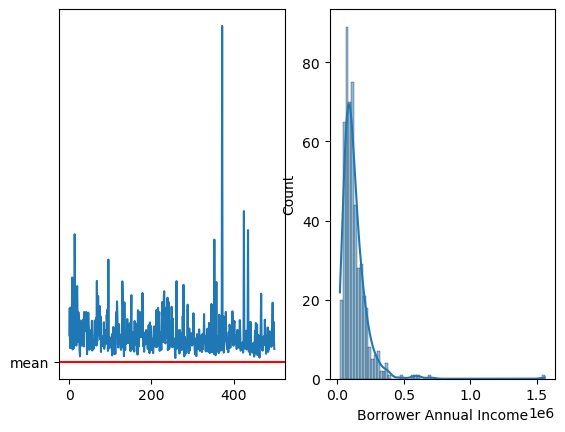

In [618]:
import matplotlib.pyplot as myplot
import seaborn as sns
fig,axes=myplot.subplots(1,2)
axes[0].plot(newDataSet["Borrower Annual Income"].values)
axes[0].axhline(y= 'mean', color='red')
#axes[1].hist(newDataSet["Borrower Annual Income"].values, bins='auto')
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto', ax=axes[1])
#newDataSet["Borrower Annual Income"].plot(kind='hist')
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Count'>

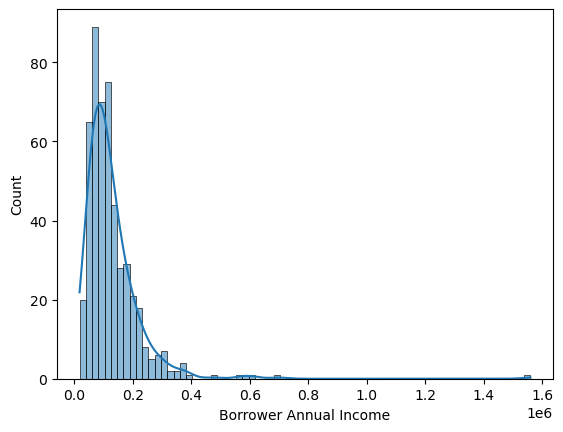

In [619]:
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto')

In [620]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
372,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58


In [621]:
summary=newDataSet["Borrower Annual Income"].agg(['mean', 'median', 'std'])
summary

mean      127626.000000
median    105500.000000
std       105177.424885
Name: Borrower Annual Income, dtype: float64

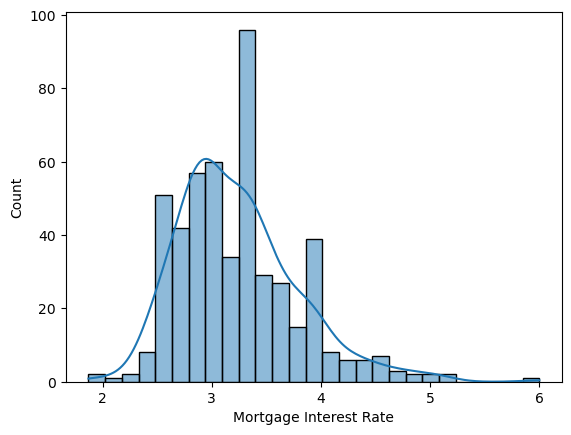

In [622]:
import seaborn as sns
sns.histplot(newDataSet['Mortgage Interest Rate'], bins='auto', kde=True)
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Density'>

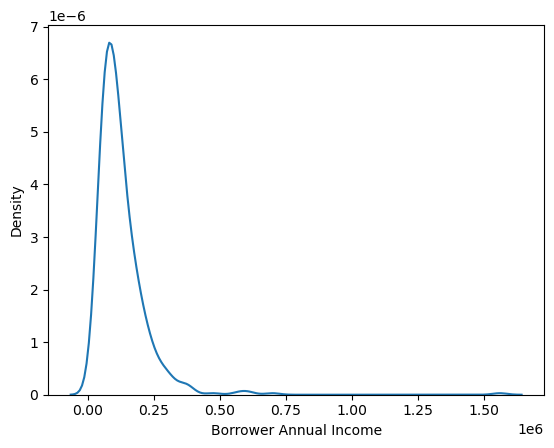

In [623]:
sns.kdeplot(newDataSet['Borrower Annual Income'], bw_adjust=0.9)

In [624]:
newDataSet[5:20]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
7,8,53,39.06,74600,392000,5.2547,2,< 25,20,265000,155000,60.00,360,2.99
8,9,36,98.09,96500,58000,0.6010,2,< 25,41,455000,185000,40.64,180,3.62
9,10,48,41.47,80000,170000,2.1250,2,< 25,20,535000,355000,65.60,180,2.37
10,11,34,40.18,96500,182000,1.8860,2,< 25,20,395000,305000,79.44,180,2.50
11,12,25,41.27,114000,64000,0.5614,2,< 25,44,465000,365000,80.00,360,4.62
12,13,6,84.75,127900,88000,0.6880,2,< 25,38,755000,385000,50.33,360,2.87
13,14,26,33.01,79700,593000,7.4404,2,< 25,20,545000,415000,75.00,360,4.75
14,15,6,34.80,127900,297000,2.3221,2,< 25,20,955000,765000,80.00,360,3.50


In [625]:
newDataSet["Borrower Annual Income"].agg(["mean","median"])

mean      127626.0
median    105500.0
Name: Borrower Annual Income, dtype: float64

In [626]:
value=newDataSet["Borrower Annual Income"].sort_values()[:499]
value.agg(["mean","median"])

mean      124755.511022
median    105000.000000
Name: Borrower Annual Income, dtype: float64

In [627]:
cat=pd.qcut(dataSet["Borrower Annual Income"],q=4)
print(cat)


0       (105500.0, 155250.0]
1      (155250.0, 1560000.0]
2       (17999.999, 69750.0]
3       (105500.0, 155250.0]
4       (105500.0, 155250.0]
               ...          
495    (155250.0, 1560000.0]
496      (69750.0, 105500.0]
497    (155250.0, 1560000.0]
498     (105500.0, 155250.0]
499     (17999.999, 69750.0]
Name: Borrower Annual Income, Length: 500, dtype: category
Categories (4, interval[float64, right]): [(17999.999, 69750.0] < (69750.0, 105500.0] < (105500.0, 155250.0] < (155250.0, 1560000.0]]


In [628]:
type(dataSet["Borrower Annual Income"])

pandas.core.series.Series

In [629]:
income_data=pd.concat([newDataSet["Borrower Annual Income"], cat], axis=1)
income_data.columns=["Income", "Category"]
income_data

,Income,Category
0,123000,"(105500.0, 155250.0]"
1,250000,"(155250.0, 1560000.0]"
2,64000,"(17999.999, 69750.0]"
3,141000,"(105500.0, 155250.0]"
4,109000,"(105500.0, 155250.0]"
...,...,...
495,275000,"(155250.0, 1560000.0]"
496,79000,"(69750.0, 105500.0]"
497,187000,"(155250.0, 1560000.0]"
498,109000,"(105500.0, 155250.0]"


In [630]:
grouped=income_data.groupby("Category")
grouped.groups.keys()

/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/1909285007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=income_data.groupby("Category")


dict_keys([Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')])

In [631]:
keys=grouped.groups.keys()
keys=list(keys)
print("list of keys", keys)
import numpy as np
keys=np.array(keys)
print('arrays', keys)
keys=keysArray.reshape((2,2))
keys

list of keys [Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')]
arrays [Interval(17999.999, 69750.0, closed='right')
 Interval(69750.0, 105500.0, closed='right')
 Interval(105500.0, 155250.0, closed='right')
 Interval(155250.0, 1560000.0, closed='right')]


NameError: name 'keysArray' is not defined

In [ ]:
grouped.groups

In [ ]:
grouped.get_group(pd.Interval(17999.999, 69750.0, closed='right'))

In [ ]:
keys=keys.reshape((2,2))
print(keys)

In [ ]:
fig1,axes=myplot.subplots(2,2, figsize=(8,8))
print("THe axes object has", axes)
for index, plots in enumerate(axes):
    print("outer array is ", index)
    for i,plotN in enumerate(plots):
        print("THe index of inner array is ", i)
        sns.histplot(grouped.get_group(keys[index,i]), ax=axes[index,i], label=f'group{index,i}', kde=True)
        myplot.legend()
myplot.show()

In [ ]:
second_group=grouped.get_group(keys[0,0])
second_group=grouped.get_group(keys[0,1])
third_group=grouped.get_group(keys[1,0])
fourth_group=grouped.get_group(keys[1,1])
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', third_group.min(), 'the max is ', third_group.max(),'\n')
print('the min of 1st group is', fourth_group.min(), 'the max is ', fourth_group.max(),'\n')


In [ ]:
import math
#math.sqrt(second_group.var())

In [ ]:
pd.DataFrame(second_group).info()

In [ ]:
second_group
#second_group=second_group.astype(float)

In [ ]:
emperical_stats=second_group.describe()
emperical_stats

In [ ]:
#fourth_group=fourth_group.astype(float)
#fourth_group.describe()

In [ ]:
cv_second_group=second_group["Income"].std()/second_group["Income"].mean() *100
cv_second_group

In [ ]:
#23% of variation in group is not desriable <10% is okay to consisder homogenousness .

In [ ]:
sns.histplot(income_data["Income"],bins=100)
myplot.xlim(0,400000)

In [ ]:
dataSet[dataSet["Borrower Annual Income"]<80000]

In [ ]:
# 3:- Let the journey Begin 

In [ ]:
# let us use the regression model to see the best attributes
dataSet.columns


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income", "Age of Borrower"],axis=1)
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)
plot_tree(model)
myplot.show()



In [ ]:
X_train[:2]

In [ ]:
from sklearn.tree import export_text
tree_rules= export_text(model, feature_names=X_train.columns)


In [ ]:
#X_train.groupby("Borrower Income Ratio").groups

In [ ]:
X_train

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    random_state=42
)

print(X_train)
model.fit(X_train, y_train)


In [ ]:
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=1,
    random_state=42
)


model.fit(X_train, y_train)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income","Age of Borrower"], axis=1)
y=dataSet["Borrower Annual Income"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [ ]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[feature>3.88]
right_tree=target[(feature>2.79) & (feature<=3.88)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

In [ ]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[(feature>1.49) & (feature<=1.91)]
right_tree=target[(feature>1.91) & (feature<=2.79)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

In [ ]:
v_parent=target.var()

In [ ]:
right_tree_var=(22/36)*right_tree.var()

right_tree_var

In [ ]:
left_tree_var=(14/36)* left_tree.var()
left_tree_var

In [ ]:
v_red_perc=( v_parent- (right_tree_var + left_tree_var) ) / v_parent
v_red_perc

In [ ]:
# The above number does not make sense without calculating the variance percentange reduction
# v_reduced= (v_parent - v_after)/ v_parent
v_parent=target.var()
v_after= (176/380 * right_tree.var() )+ (204/380 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

In [ ]:
v_parent=target.var()
v_after= (85/115 * right_tree.var() )+ (30/115 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

In [ ]:
new_data=dataSet[dataSet["Borrower Income Ratio" ]>  3.88][["Borrower Income Ratio","Borrower Annual Income"]]

In [ ]:
new_data

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Income Ratio","Age of Borrower","Borrower Annual Income"], axis=1)
y=dataSet["Borrower Income Ratio"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [ ]:
data_for_clustering=dataSet.drop(["Age of Borrower"], axis=1)
data_for_clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_for_clustering)
data_for_clustering['cluster']=kmeans.labels_
data_for_clustering

In [ ]:
clusters=data_for_clustering.groupby(by="cluster")
clusters.groups

In [ ]:
second_cluster=clusters.get_group(0)
second_cluster


In [ ]:
second_cluster=clusters.get_group(1)
second_cluster



In [ ]:
third_cluster=clusters.get_group(2)
print(third_cluster.shape)
third_cluster



In [ ]:
kmeans.cluster_centers_

In [ ]:
data_for_clustering.groupby(by="cluster").mean()

In [ ]:
from sklearn.cluster import KMeans
new_data_for_cluster=dataSet.drop(["Borrower ID Number","Age of Borrower"], axis=1)
new_kmeans=KMeans( random_state=42)
new_kmeans.fit(new_data_for_cluster)
new_kmeans.cluster_centers_

new_data_for_cluster["clusters"]=new_kmeans.labels_
new_kmeans.n_clusters

In [ ]:
new_data_for_cluster.groupby("clusters").mean()

In [ ]:
second=new_data_for_cluster.groupby(by='clusters').get_group(0)
second

In [ ]:
import seaborn as sns
sns.lineplot(second["Borrower Income Ratio"].sort_values())

In [ ]:
a=second["Borrower Income Ratio"].sort_values().reset_index(drop=True)
a

In [ ]:
sns.histplot(second["Borrower Income Ratio"].sort_values().reset_index(drop=True), kde=True)

In [ ]:
sns.histplot(dataSet["Borrower Income Ratio"].sort_values().reset_index(drop=True) )

In [ ]:
sns.histplot(new_data_for_cluster.groupby(by='clusters').get_group(1)["Borrower Income Ratio"].reset_index(drop=True),kde= True)

In [ ]:
for i in range(10):
    print(i)

In [ ]:
new_data_for_cluster

In [ ]:
data_for_clustering.columns

In [644]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia1=[]
K =range(1,16)
data1=data_for_clustering.drop(["Borrower ID Number","cluster"], axis=1)
for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia1.append(kmean.inertia_)
print(inertia1)

[47312717685094.91, 20896510790715.75, 14788264678769.586, 11619334556573.71, 9923323381875.764, 7907111676019.516, 6903265895777.26, 6196289702447.646, 5844405088551.535, 5474593972506.455, 4663863256292.891, 4372300641685.2666, 4052695682359.914, 3820762120173.2993, 3661640118556.379]


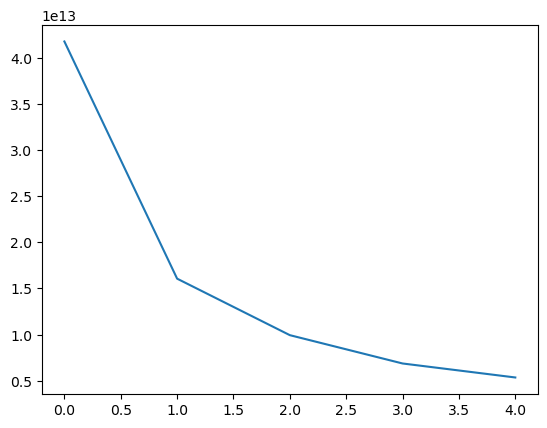

In [645]:
myplot.plot(pd.Series(inertia))

In [646]:
pd.Series(inertia)

0    4.179263e+13
1    1.606114e+13
2    9.931559e+12
3    6.859196e+12
4    5.341028e+12
dtype: float64

In [1244]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia=[]

K =range(1,3)

for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia.append(kmean.inertia_)
print(inertia)
clusters=kmean.labels_

print(len(clusters))
k_five_means_data_set=data1
k_five_means_data_set["Cluster"]=clusters
k_five_means_data_set

[47312717686133.72, 20896510791397.273]
500


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0
498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,1


In [1245]:
# Now the task comes of cross checking these clusters(k=5) with the help of scatterplot where we will use PCA

In [1246]:
k_five_means_data_set["Cluster"].value_counts()

Cluster
0    353
1    147
Name: count, dtype: int64

In [1247]:
k=k_five_means_data_set
k[k["Cluster"]==1]

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
9,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,1
12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,1
492,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,1
494,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,1
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1


In [1248]:
len(dataSet.columns)

14

In [1249]:
len(data1.columns)

13

In [1250]:
kmean.cluster_centers_

array([[2.76543909e+01, 2.53764306e+01, 8.18702550e+04, 1.02490085e+05,
        1.28071926e+00, 1.85835694e+00, 3.03257790e+01, 3.05368272e+05,
        2.18144476e+05, 7.34658357e+01, 3.18696884e+02, 3.27566572e+00,
        1.11048159e+00],
       [2.02108844e+01, 3.53819048e+01, 9.35367347e+04, 1.87986395e+05,
        2.12098435e+00, 1.95918367e+00, 3.02244898e+01, 7.45476190e+05,
        4.49217687e+05, 6.40409524e+01, 3.33061224e+02, 3.13782313e+00,
        2.96598639e+00]])

In [1251]:
len(data1.columns)

13

In [1252]:
k["Cluster"].value_counts()

Cluster
0    353
1    147
Name: count, dtype: int64

In [1253]:
k_group=k.groupby(by="Cluster")
print(k_group.groups.keys())

dict_keys([0, 1])


In [1254]:
second_cluster=k_group.get_group(0)
second_cluster

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
6,8,81.63,100000,145000,1.45,1,30,475000,395000,85,180,2.12,0
7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62,0
493,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,0
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0


In [1255]:
second_cluster=k_group.get_group(1)
print(second_cluster.shape)
second_cluster

(147, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
9,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,1
12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,1
492,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,1
494,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,1
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1


In [1256]:
third_cluster=k_group.get_group(2)
print(third_cluster.shape)
third_cluster

KeyError: 2

In [686]:
fourth_cluster=k_group.get_group(3)
print(fourth_cluster.shape)
fourth_cluster

(11, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
114,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,3
131,6,24.95,97800,222000,2.2699,1,20,1105000,715000,64.81,360,3,3
231,6,32.62,127900,328000,2.5645,2,20,1915000,715000,37.38,240,2.5,3
235,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,3
261,39,17.14,84600,375000,4.4326,2,37,1505000,515000,34.02,360,3,3
334,37,8.04,80100,124000,1.5481,2,38,1605000,515000,31.9,360,2.5,3
369,6,25.17,127900,117000,0.9148,2,38,1215000,395000,32.23,240,3,3
381,20,11.96,85900,232000,2.7008,2,36,1155000,515000,44.38,240,3.5,3
410,6,63.85,83300,126000,1.5126,1,44,1265000,655000,57.11,360,2.99,3
457,6,28.31,83300,174000,2.0888,2,44,1445000,725000,50.45,360,3.87,3


In [687]:
fifth_cluster=k_group.get_group(3)
print(fifth_cluster.shape)
fifth_cluster

(11, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
114,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,3
131,6,24.95,97800,222000,2.2699,1,20,1105000,715000,64.81,360,3,3
231,6,32.62,127900,328000,2.5645,2,20,1915000,715000,37.38,240,2.5,3
235,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,3
261,39,17.14,84600,375000,4.4326,2,37,1505000,515000,34.02,360,3,3
334,37,8.04,80100,124000,1.5481,2,38,1605000,515000,31.9,360,2.5,3
369,6,25.17,127900,117000,0.9148,2,38,1215000,395000,32.23,240,3,3
381,20,11.96,85900,232000,2.7008,2,36,1155000,515000,44.38,240,3.5,3
410,6,63.85,83300,126000,1.5126,1,44,1265000,655000,57.11,360,2.99,3
457,6,28.31,83300,174000,2.0888,2,44,1445000,725000,50.45,360,3.87,3


In [1257]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_for_pca=k_five_means_data_set.drop("Cluster", axis=1)
data_for_pca["Borrower Annual Income"]=dataSet["Borrower Annual Income"]
scalerd_data=scaler.fit_transform(data_for_pca)


In [1258]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
scalered_data_pca=pca.fit_transform(scalerd_data)


In [1259]:

pca.components_

array([[-0.13885604,  0.13698082,  0.22332004,  0.45619587,  0.39996485,
         0.14881843, -0.14651136,  0.49085175,  0.45569953, -0.19083105,
        -0.03262311, -0.11960808],
       [ 0.16483454, -0.26100335, -0.36634934,  0.42389561,  0.49540449,
        -0.04552549, -0.38573437, -0.3076795 , -0.23765883,  0.16713647,
        -0.0734523 ,  0.10020022]])

In [1260]:
pca.components_

array([[-0.13885604,  0.13698082,  0.22332004,  0.45619587,  0.39996485,
         0.14881843, -0.14651136,  0.49085175,  0.45569953, -0.19083105,
        -0.03262311, -0.11960808],
       [ 0.16483454, -0.26100335, -0.36634934,  0.42389561,  0.49540449,
        -0.04552549, -0.38573437, -0.3076795 , -0.23765883,  0.16713647,
        -0.0734523 ,  0.10020022]])

In [1261]:
pca.explained_variance_ratio_

array([0.22949195, 0.15908608])

In [1262]:
scalered_data_pca.shape

(500, 2)

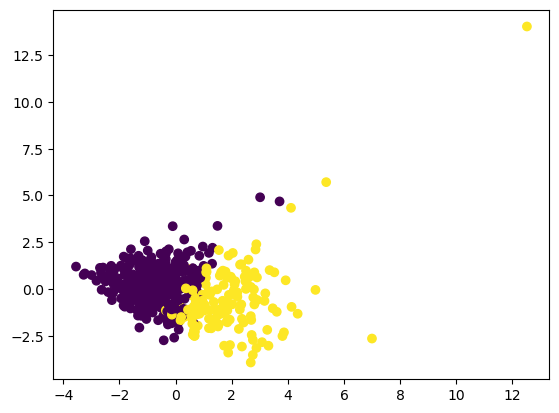

In [1263]:
myplot.scatter(scalered_data_pca[:,0], scalered_data_pca[:,1], c=kmean.labels_)

In [674]:

k_second_cluster=second_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_second_cluster

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
2,36,98.09,96500,58000,0.601,2,41,455000,185000,40.64,180,3.62
3,34,40.18,96500,182000,1.886,2,20,395000,305000,79.44,180,2.5
4,25,41.27,114000,64000,0.5614,2,44,465000,365000,80,360,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...
159,22,31.96,54400,62000,1.1397,2,45,355000,285000,79.63,360,2.75
160,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62
161,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75
162,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3


<Axes: ylabel='Frequency'>

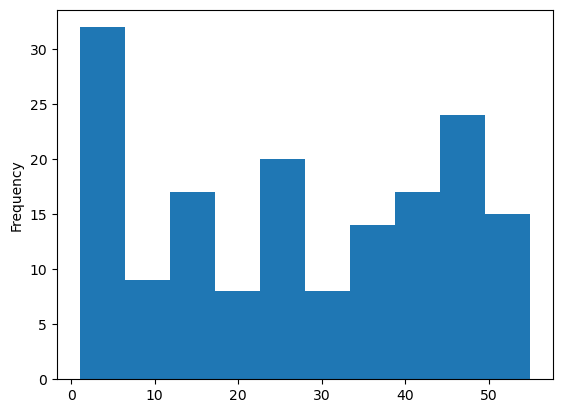

In [680]:
k_second_cluster["Wide Area Location Code"].plot(kind="hist")

<Axes: ylabel='Frequency'>

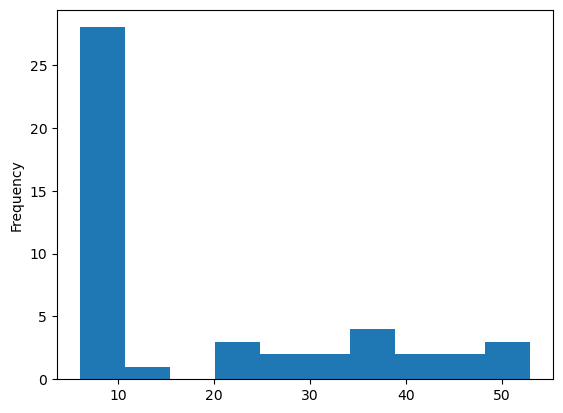

In [696]:
k_second_cluster=second_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_second_cluster["Wide Area Location Code"].plot(kind='hist')

In [695]:
k_second_cluster.columns

Index(['Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [706]:
k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
#k_third_cluster["Wide Area Location Code"].plot(kind='hist')
axes[0,0].plot(k_third_cluster["Wide Area Location Code"])
myplot.show()

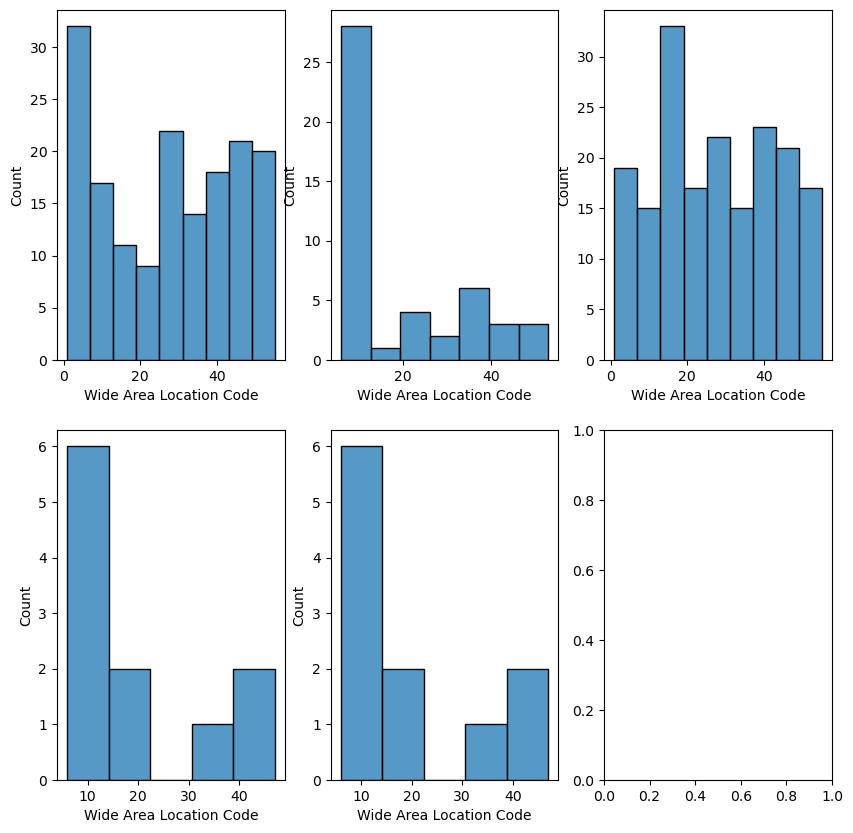

In [721]:
import seaborn as sns
fig, axes=myplot.subplots(2,3, figsize=(10,10))

k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fourth_cluster=fourth_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fifth_cluster=fifth_cluster.drop("Cluster",axis=1).reset_index(drop=True)

sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,0])

sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,1])
sns.histplot(data=k_third_cluster["Wide Area Location Code"], ax=axes[0,2])
sns.histplot(data=k_fourth_cluster["Wide Area Location Code"], ax=axes[1,0])
sns.histplot(data=k_fifth_cluster["Wide Area Location Code"], ax=axes[1,1])

myplot.show()

In [730]:
import seaborn as sns
sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,0])

<Axes: xlabel='Wide Area Location Code', ylabel='Count'>

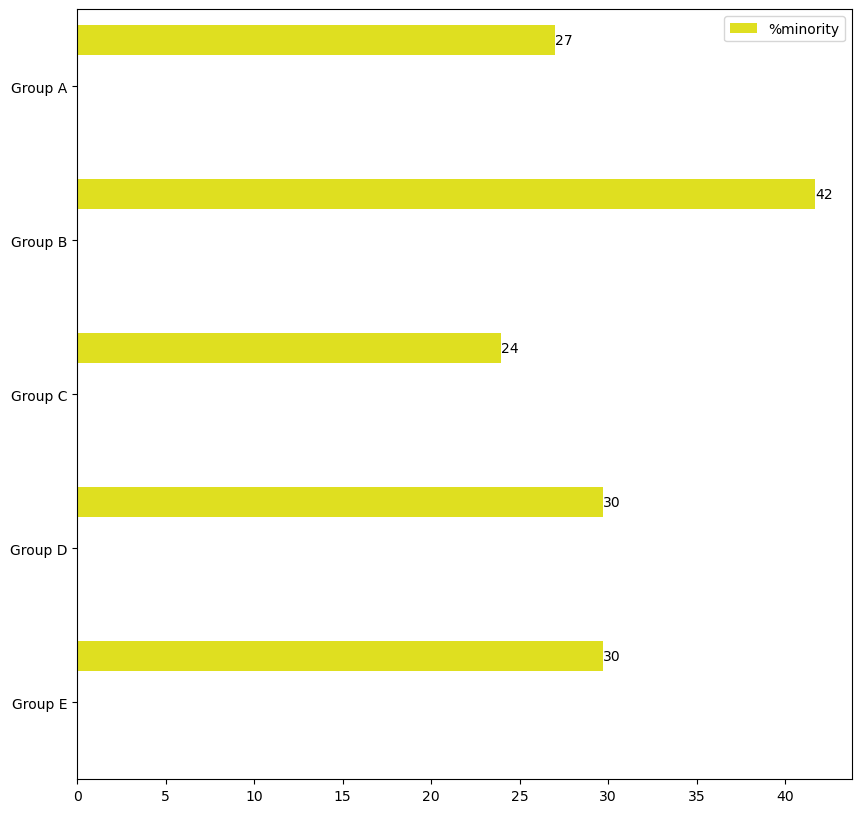

In [796]:
import seaborn as sns
fig, axes=myplot.subplots(1,1, figsize=(10,10))

k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fourth_cluster=fourth_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fifth_cluster=fifth_cluster.drop("Cluster",axis=1).reset_index(drop=True)


ax=sns.barplot(data=means, orient='h', label="%minority", color='yellow',height=0.2)
axes.legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()

% minority_mean                     27.021951
median_family_income_mean        84364.024390
borrower_annual_income          118506.097561
borrower_income_ratio                1.448484
dti                                 30.597561
appraised_home_value            383475.609756
LTV_ratio                           74.654939
length_of_mortgage_in_months       321.951220
mortgage_interest_rate               3.196280
dtype: float64


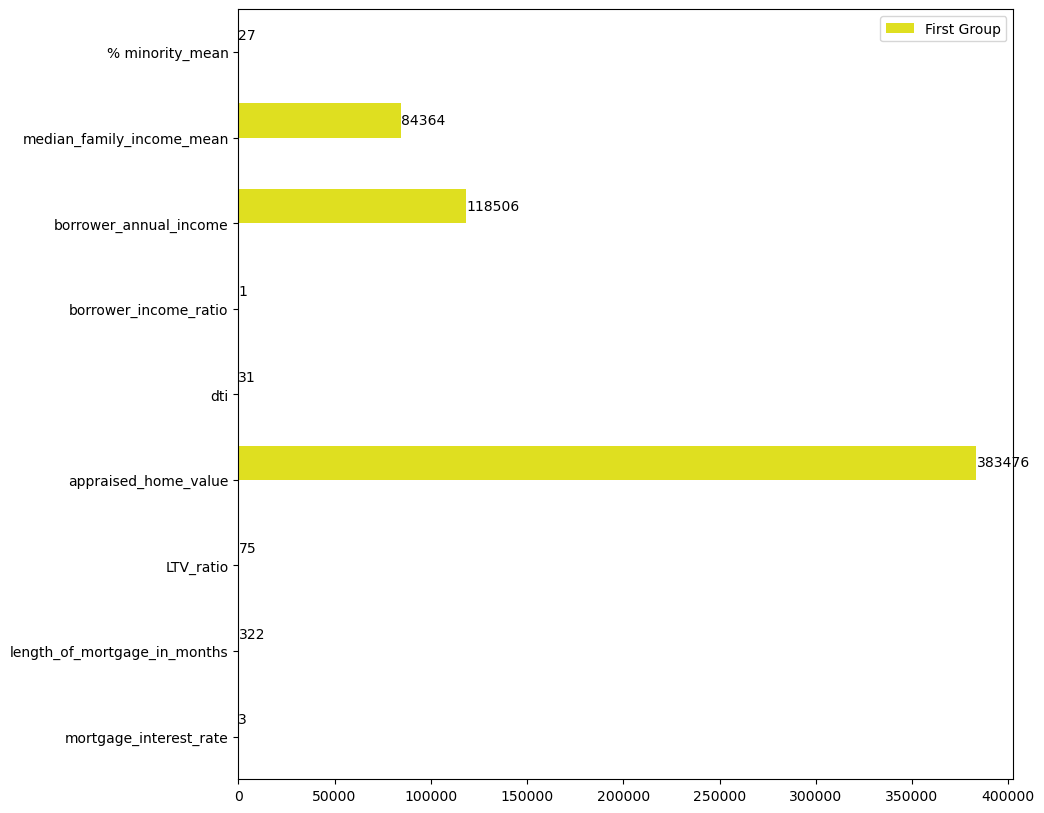

In [808]:
import seaborn as sns
fig, axes=myplot.subplots( figsize=(10,10))

minority_mean= k_first_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_first_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_first_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_first_cluster["Borrower Income Ratio"].mean()
dti=  k_first_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_first_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_first_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_first_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_first_cluster["Mortgage Interest Rate"].mean()
means=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series=pd.Series(means)
all_means_series.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]
print(all_means_series)

ax=sns.barplot(data=all_means_series, orient='h', label="First Group", color='yellow',height=0.4, ax=axes)
axes.legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()



% minority_mean                     41.705957
median_family_income_mean        98491.489362
borrower_annual_income          173382.978723
borrower_income_ratio                1.836796
dti                                 29.404255
appraised_home_value            845851.063830
LTV_ratio                           60.898723
length_of_mortgage_in_months       342.127660
mortgage_interest_rate               3.147234
dtype: float64


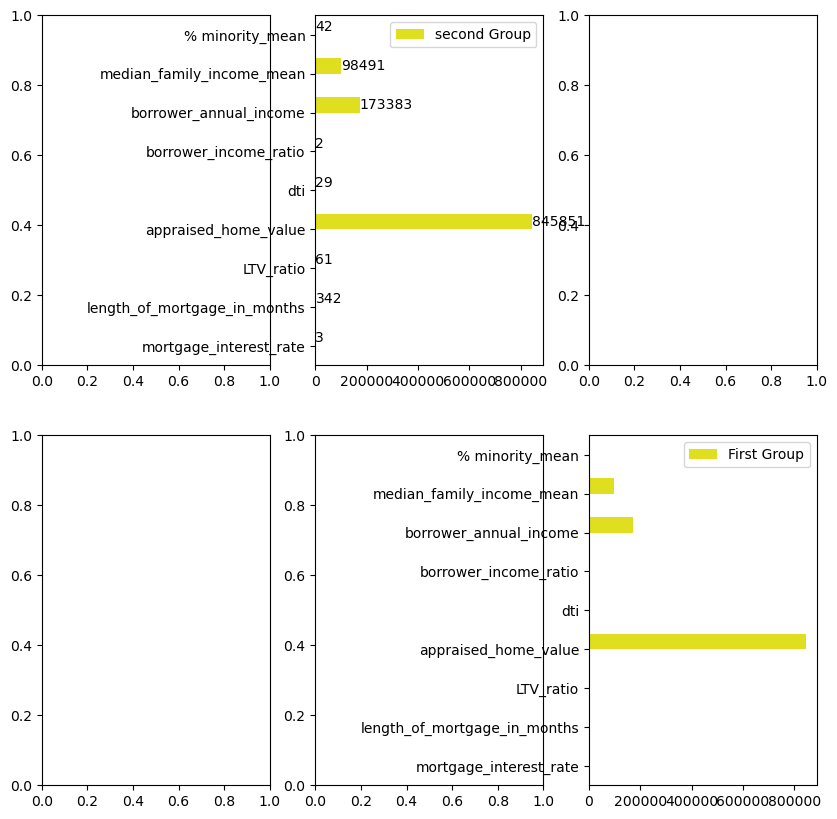

In [816]:
import seaborn as sns
fig, axes=myplot.subplots(2,3, figsize=(10,10))

minority_mean= k_second_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_second_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_second_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_second_cluster["Borrower Income Ratio"].mean()
dti=  k_second_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_second_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_second_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_second_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_second_cluster["Mortgage Interest Rate"].mean()
means=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series=pd.Series(means)
all_means_series.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]
print(all_means_series)

ax2=sns.barplot(data=all_means_series, orient='h', label="second Group", color='yellow',height=0.4, ax=axes[0,1])
axes[0,1].legend(loc='best')

for bar in ax2.patches:
    ax2.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )




minority_mean= k_first_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_first_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_first_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_first_cluster["Borrower Income Ratio"].mean()
dti=  k_first_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_first_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_first_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_first_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_first_cluster["Mortgage Interest Rate"].mean()
means1=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series1=pd.Series(means1)
all_means_series1.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]


ax1=sns.barplot(data=all_means_series, orient='h', label="First Group", color='yellow',height=0.4, ax=axes[1,2])
axes[1,2].legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()


In [817]:
# New Professional Approach 

In [1281]:
new_data_for_clustering= data_for_clustering.drop(["Borrower ID Number","cluster"], axis=1)
new_data_for_clustering

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87
498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62


In [1282]:
from sklearn.preprocessing import StandardScaler
standardised_data_for_clustering=StandardScaler().fit_transform(new_data_for_clustering)
standardised_data_for_clustering=pd.DataFrame(standardised_data_for_clustering)


In [1283]:
print(data_for_clustering["Wide Area Location Code"].mean())
print(standardised_data_for_clustering[1].mean())

25.50501002004008
-5.695733352786374e-17


In [1284]:
standardised_data_for_clustering.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,1.050151e-16,-5.695733e-17,1.423933e-16,2.847867e-17,-7.119667e-17,-3.381842e-16,-1.067950e-16,5.695733e-17,4.271800e-17,-3.631030e-16,-1.851113e-16,1.210343e-16
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-1.482514e+00,-1.134670e+00,-2.095021e+00,-1.281251e+00,-1.258488e+00,-2.812599e+00,-1.689307e+00,-1.577738e+00,-1.877798e+00,-3.495667e+00,-2.888326e+00,-2.472914e+00
25%,-1.059025e+00,-7.562580e-01,-6.583574e-01,-6.631620e-01,-6.435038e-01,3.555430e-01,-8.586369e-01,-6.698562e-01,-7.266663e-01,-6.377152e-01,5.290413e-01,-6.605237e-01
50%,-3.055229e-02,-3.660140e-01,-1.287263e-01,-2.371004e-01,-2.575595e-01,3.555430e-01,-2.796646e-02,-3.145983e-01,-1.511005e-01,2.153781e-01,5.290413e-01,-2.074261e-01
75%,8.466744e-01,4.755356e-01,6.451060e-01,3.629863e-01,3.872269e-01,3.555430e-01,8.857710e-01,4.748638e-01,6.403026e-01,5.545884e-01,5.290413e-01,4.812823e-01
max,1.784399e+00,2.983704e+00,3.455005e+00,6.903932e+00,7.893059e+00,3.555430e-01,1.633374e+00,5.843206e+00,3.446186e+00,1.568047e+00,5.290413e-01,5.012258e+00


<Axes: ylabel='Borrower Annual Income'>

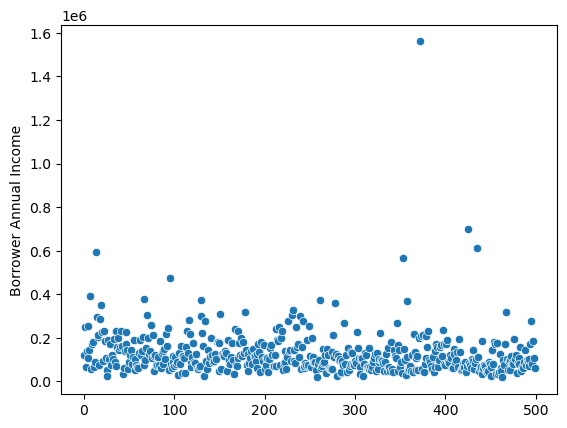

In [1285]:
sns.scatterplot(new_data_for_cluster["Borrower Annual Income"])

In [1286]:
# What is the best way to know or see whether there is an outlier in any attribute or entire data set at once?

{'whiskers': [<matplotlib.lines.Line2D at 0x1662a8290>,
 'caps': [<matplotlib.lines.Line2D at 0x1662a86b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x165ff2000>],
 'medians': [<matplotlib.lines.Line2D at 0x1662a8d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1662a8fb0>],
 'means': []}

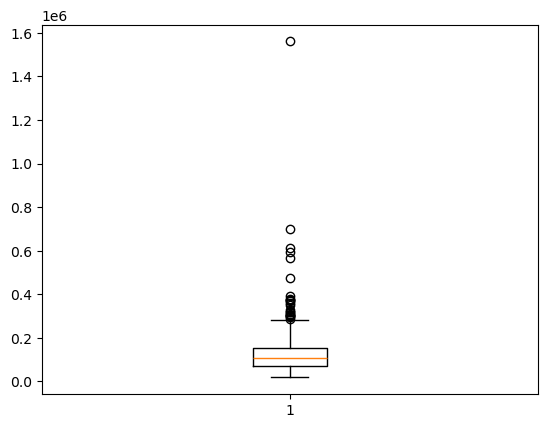

In [1287]:
myplot.boxplot(new_data_for_cluster["Borrower Annual Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x166019e20>,
 'caps': [<matplotlib.lines.Line2D at 0x165db5100>,
 'boxes': [<matplotlib.lines.Line2D at 0x16601a030>],
 'medians': [<matplotlib.lines.Line2D at 0x16618ba70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1660b4e60>],
 'means': []}

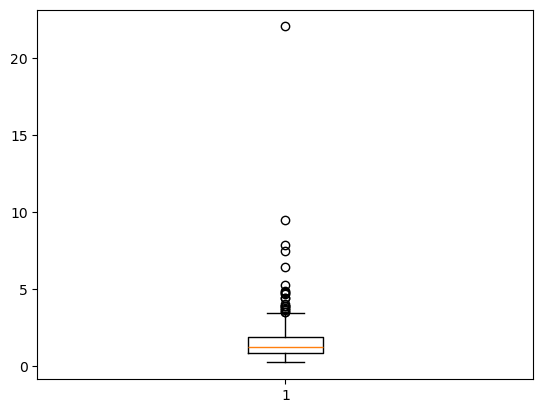

In [1288]:
myplot.boxplot(new_data_for_cluster["Borrower Income Ratio"])

{'whiskers': [<matplotlib.lines.Line2D at 0x166306750>,
 'caps': [<matplotlib.lines.Line2D at 0x166306c60>,
 'boxes': [<matplotlib.lines.Line2D at 0x166306450>],
 'medians': [<matplotlib.lines.Line2D at 0x1663070e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x166307320>],
 'means': []}

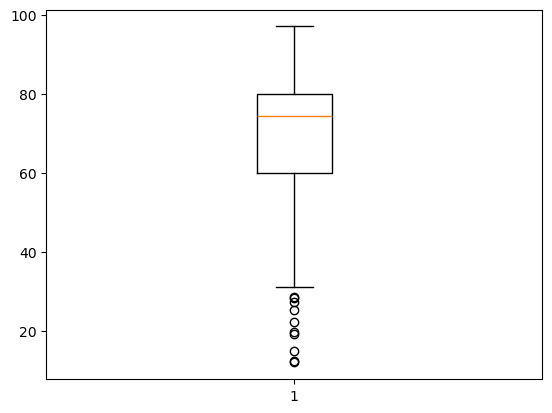

In [1289]:
myplot.boxplot(new_data_for_cluster["LTV Ratio"])


In [1290]:
dtype(new_data_for_cluster["LTV Ratio"]).describe()

NameError: name 'dtype' is not defined

In [ ]:
new_data_for_cluster["LTV Ratio"][(new_data_for_cluster["LTV Ratio"]>=60)&(new_data_for_cluster["LTV Ratio"]<=80)].reset_index(drop=True)

In [1291]:
small_ltv=new_data_for_cluster[(new_data_for_cluster["LTV Ratio"]>=1)&(new_data_for_cluster["LTV Ratio"]<=35)].reset_index(drop=True)
small_ltv

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
1,26,13.28,79000,26000,0.3291,2,39,165000,35000,19.35,360,3.87,2
2,4,22.68,77800,51000,0.6555,2,10,355000,95000,27.42,360,3.62,0
3,34,48.53,96500,69000,0.715,2,30,305000,105000,35,360,2.5,2
4,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,4
5,6,80.94,92700,91000,0.9817,2,37,715000,225000,31.35,180,2.75,3
6,6,70.38,83300,127000,1.5246,2,20,805000,155000,19.75,360,3.12,3
7,6,75.54,127900,82000,0.6411,2,20,965000,305000,31.08,360,2.87,3
8,53,33.07,106900,125000,1.1693,2,30,765000,265000,35,180,2.5,3
9,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,4


{'whiskers': [<matplotlib.lines.Line2D at 0x166398e90>,
 'caps': [<matplotlib.lines.Line2D at 0x16639a5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x166399940>],
 'medians': [<matplotlib.lines.Line2D at 0x16608dca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16641e810>],
 'means': []}

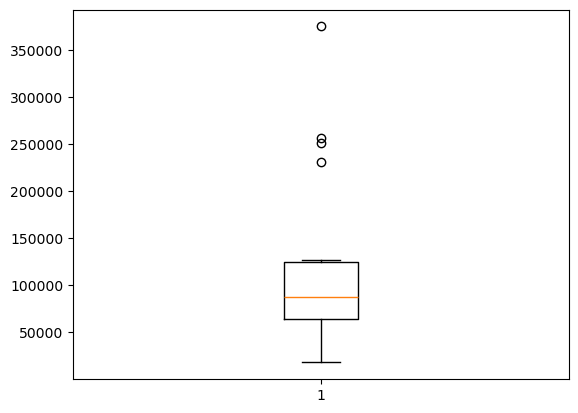

In [1292]:
myplot.boxplot(small_ltv["Borrower Annual Income"])

In [1293]:
new_data_for_cluster[new_data_for_cluster.loc[:,"Borrower Annual Income"]==new_data_for_cluster["Borrower Annual Income"].max()]

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
372,6,16.56,70700,1560000,22.0651,2,10,465000,325000,69.56,360,3.58,7


In [1294]:
data_for_clustering.drop(372, inplace=True)

KeyError: '[372] not found in axis'

In [ ]:
data_for_clustering.shape

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca=data_for_clustering.drop("cluster", axis=1)

scalerd_data=scaler.fit_transform(new_data_for_pca)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca=data_for_clustering.drop("cluster", axis=1)

scalerd_data=scaler.fit_transform(new_data_for_pca)

from sklearn.decomposition import PCA
pca2= PCA(n_components=11)
new_scalered_data=pca2.fit_transform(scalerd_data)


In [1295]:
pca2.explained_variance_

array([2.91065022, 1.85451669])

In [1296]:
new_scalered_data

array([[ 0.33334811, -1.11274644, -1.28538099, ...,  1.0505506 ,
        -1.61487785,  0.43916376],
       [ 2.60261261,  0.24602038,  2.19528372, ...,  0.58683533,
         0.29497647, -0.39167773],
       [-0.26373015,  0.81081927, -3.75819766, ..., -0.90891375,
        -0.4857004 ,  0.70768981],
       ...,
       [ 0.49456115, -2.441359  , -2.13862193, ..., -0.37246052,
         0.24195794,  0.05661352],
       [ 0.09901973,  0.26848256,  0.74576115, ...,  0.58574498,
        -0.43608637, -0.89636504],
       [-1.68396478,  1.2687022 ,  1.45677928, ..., -1.53819825,
        -0.02731004,  0.10835196]])

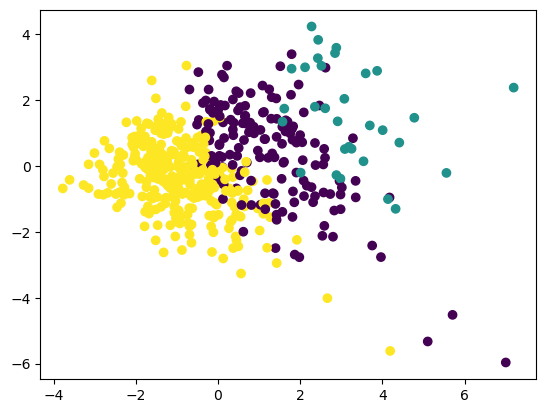

In [1297]:

myplot.scatter(new_scalered_data[:,0], new_scalered_data[:,1], c=data_for_clustering["cluster"])

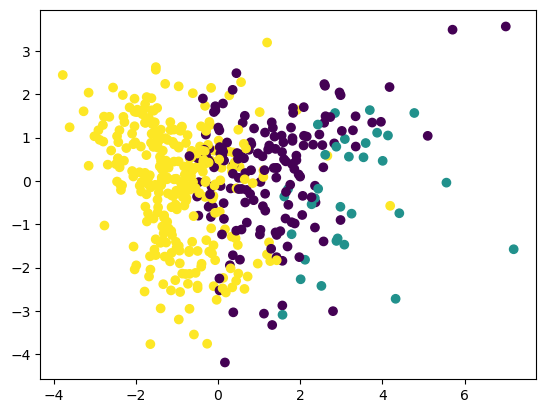

In [1298]:
myplot.scatter(new_scalered_data[:,0], new_scalered_data[:,2], c=data_for_clustering["cluster"])

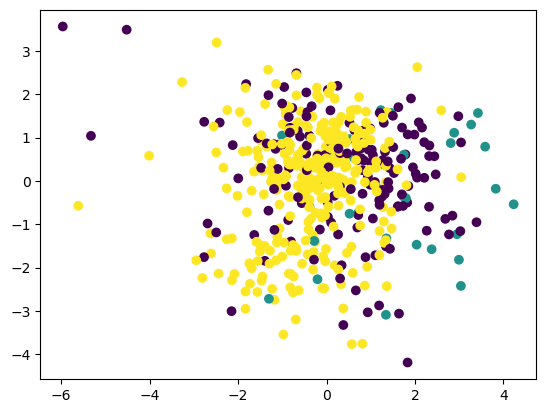

In [1299]:
myplot.scatter(new_scalered_data[:,1], new_scalered_data[:,2], c=data_for_clustering["cluster"])


In [1300]:

import numpy as np

data = new_data_for_cluster["Borrower Annual Income"]
np.percentile(data, 1)    # 1st percentile
np.percentile(data, 50)   # median
np.percentile(data, 99)

475929.9999999991

In [1301]:
data.max()

1560000

In [1302]:
import numpy as np

data = [40, 45, 48, 50, 52, 55, 60, 65, 70, 80]


np.percentile(data, 99)   # 99th percentile


79.1

### Let us Find the outliers for each column manually

In [1303]:
q1=new_data_for_cluster["Borrower Income Ratio"].quantile(0.25)
q2=new_data_for_cluster["Borrower Income Ratio"].quantile(0.50)
q3=new_data_for_cluster["Borrower Income Ratio"].quantile(0.75)
iqr=q3-q1
lower_whisker=q1- 1.5 *iqr
upper_whisker=q3 + 1.5*iqr
outliers=new_data_for_cluster[(new_data_for_cluster["Borrower Income Ratio"]<lower_whisker) | (new_data_for_cluster["Borrower Income Ratio"]>upper_whisker)] 
borrower_income_outlier=outliers["Borrower Income Ratio"]
borrower_income_outlier

7       5.2547
13      7.4404
19      4.6933
67      4.3823
70      3.6735
95      4.8668
129     4.7103
130     3.6255
134     3.8796
178     3.4858
239     3.8752
249     3.7482
261     4.4326
288      3.906
302     3.5202
353      7.867
358     4.0022
372    22.0651
425     9.4851
435     6.4017
467      4.825
Name: Borrower Income Ratio, dtype: object

In [1304]:
special_income_ratio_customer=new_data_for_cluster.iloc[list(borrower_income_outlier.index)]
special_income_ratio_customer

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
13,26,33.01,79700,593000,7.4404,2,20,545000,415000,75,360,4.75,7
19,6,65.52,75000,352000,4.6933,2,30,755000,505000,68,360,4.12,5
67,34,3.31,85800,376000,4.3823,2,20,635000,475000,74.92,360,3.12,5
70,6,35.67,83300,306000,3.6735,2,10,835000,535000,64.81,360,3.25,1
95,48,15.97,97600,475000,4.8668,2,30,505000,375000,74.32,360,2.99,5
129,21,90.31,79400,374000,4.7103,1,30,115000,95000,80,360,4.25,2
130,6,78.83,83300,302000,3.6255,2,10,635000,355000,55.79,360,3.5,5
134,5,18.28,71400,277000,3.8796,2,10,145000,115000,80,360,5.12,2
178,9,7.24,91800,320000,3.4858,2,20,625000,355000,56.4,360,3.87,5


In [1305]:
l1=new_data_for_cluster["LTV Ratio"].quantile(0.25)
l2=new_data_for_cluster["LTV Ratio"].quantile(0.50)
l3=new_data_for_cluster["LTV Ratio"].quantile(0.75)
iqr=l3-l1
lower_whisker=l1- 1.5 *iqr
upper_whisker=l3 + 1.5*iqr
outliers=new_data_for_cluster[(new_data_for_cluster["LTV Ratio"]<lower_whisker) | (new_data_for_cluster["LTV Ratio"]>upper_whisker)] 
LTV_outlier=outliers["LTV Ratio"]
list(LTV_outlier)

[28.55, 19.35, 27.42, 19.75, 28.34, 25.29, 12.5, 12.06, 15, 22.41]

(array([434.,  56.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.2113 ,  2.39668,  4.58206,  6.76744,  8.95282, 11.1382 ,
        13.32358, 15.50896, 17.69434, 19.87972, 22.0651 ]),
 <BarContainer object of 10 artists>)

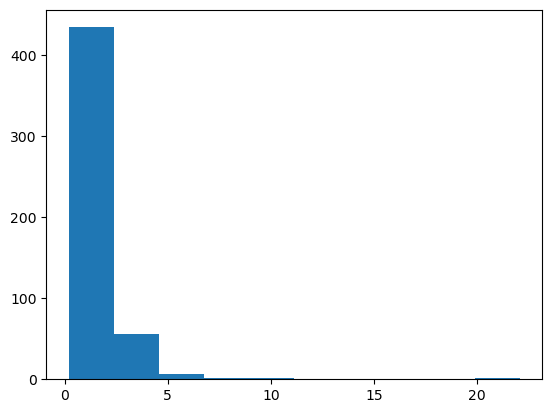

In [1306]:
myplot.hist(new_data_for_cluster["Borrower Income Ratio"].sort_values())

In [1307]:
first_percentile=np.percentile(new_data_for_cluster["LTV Ratio"], 100)
first_percentile

97.0

(array([434.,  56.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.2113 ,  2.39668,  4.58206,  6.76744,  8.95282, 11.1382 ,
        13.32358, 15.50896, 17.69434, 19.87972, 22.0651 ]),
 <BarContainer object of 10 artists>)

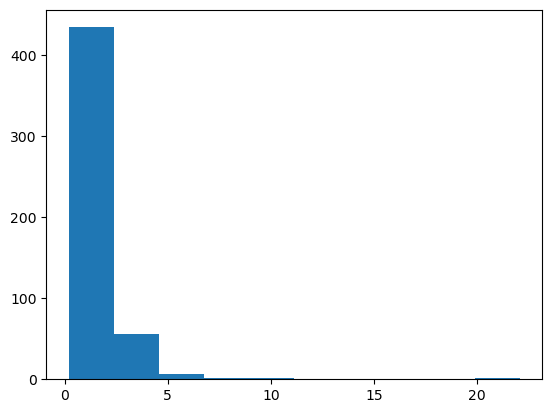

In [1308]:
myplot.hist(new_data_for_cluster["Borrower Income Ratio"].sort_values())

In [1309]:
new_data_for_cluster["LTV Ratio"].max()

97

(array([  5.,   5.,  14.,  22.,  41.,  51.,  78., 175.,  35.,  74.]),
 array([12.06 , 20.554, 29.048, 37.542, 46.036, 54.53 , 63.024, 71.518,
        80.012, 88.506, 97.   ]),
 <BarContainer object of 10 artists>)

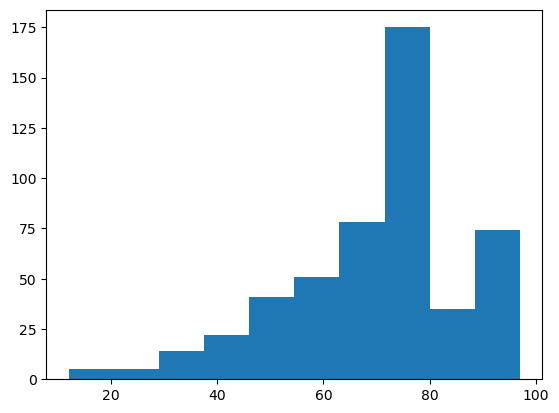

In [1310]:
myplot.hist(new_data_for_cluster["LTV Ratio"].sort_values().reset_index(drop=True))

In [1311]:
np.percentile(new_data_for_cluster["Borrower Income Ratio"].sort_values().reset_index(drop=True),99)

5.266169999999989

In [1312]:
np.percentile(new_data_for_cluster["LTV Ratio"].sort_values().reset_index(drop=True),99)


95.0

{'whiskers': [<matplotlib.lines.Line2D at 0x166953fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x166a001a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1662d2000>],
 'medians': [<matplotlib.lines.Line2D at 0x166a00710>],
 'fliers': [<matplotlib.lines.Line2D at 0x166a00950>],
 'means': []}

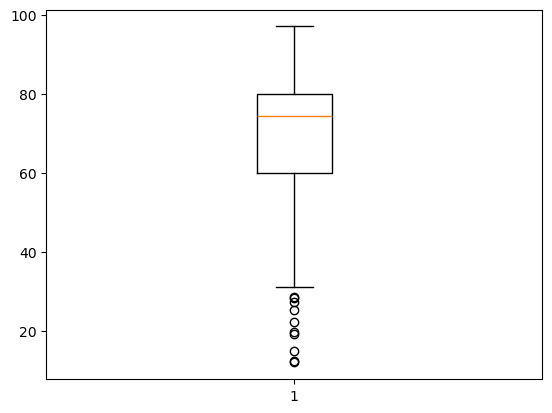

In [1313]:

myplot.boxplot(new_data_for_cluster["LTV Ratio"])

In [1314]:
list(new_data_for_cluster["Borrower Income Ratio"].sort_values())[4]

0.3281

In [1315]:
data_for_clustering.iloc[LTV_outlier.index]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
26,27,26,13.28,79000,26000,0.3291,2,39,165000,35000,19.35,360,3.87,2
94,95,4,22.68,77800,51000,0.6555,2,10,355000,95000,27.42,360,3.62,2
145,146,6,70.38,83300,127000,1.5246,2,20,805000,155000,19.75,360,3.12,0
235,236,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,1
249,250,12,25.71,68300,256000,3.7482,2,20,785000,195000,25.29,120,2.75,0
258,259,39,2.55,85200,18000,0.2113,2,47,405000,45000,12.5,240,3,2
309,310,42,2.67,82300,27000,0.3281,2,37,325000,35000,12.06,360,4.12,2
474,475,20,7.17,88800,83000,0.9347,2,30,235000,175000,75.32,180,3.25,2
493,494,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,2


{'whiskers': [<matplotlib.lines.Line2D at 0x166aa3200>,
 'caps': [<matplotlib.lines.Line2D at 0x166aa3770>,
 'boxes': [<matplotlib.lines.Line2D at 0x166aa2f00>],
 'medians': [<matplotlib.lines.Line2D at 0x166aa3d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x166aa3fb0>],
 'means': []}

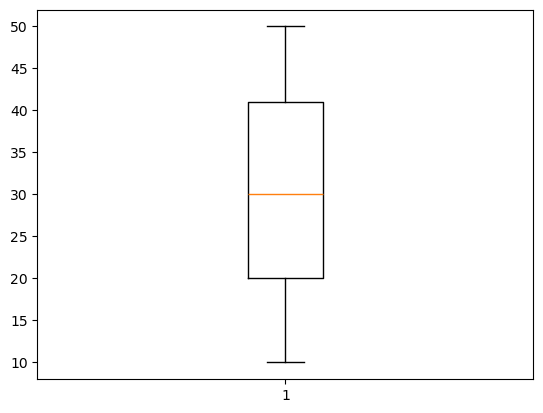

In [1316]:
myplot.boxplot(new_data_for_cluster["Borrower Debt to Income Ratio"])

In [1317]:
print(new_data_for_cluster["LTV Ratio"].median())
new_data_for_cluster["LTV Ratio"].mean()

74.295


70.69492000000005

In [1318]:
len(new_data_for_clustering.columns)

12

In [1319]:
columns=np.array(new_data_for_clustering.columns)

reshaped_columns_in_2d=columns.reshape(2,6)

reshaped_columns_in_2d

array([['Wide Area Location Code', '% Minority in Local Area',
        'Median Family Income in Local Area', 'Borrower Annual Income',
        'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)'],
       ['Borrower Debt to Income Ratio', 'Appraised Value of Home',
        'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
        'Mortgage Interest Rate']], dtype=object)

In [1320]:
for i in list(range(0,2)):
    for j in list(range(0,6)):
        axes[i,j].plot(new_data_for_clustering[reshaped_columns_in_2d[i,j]])
   

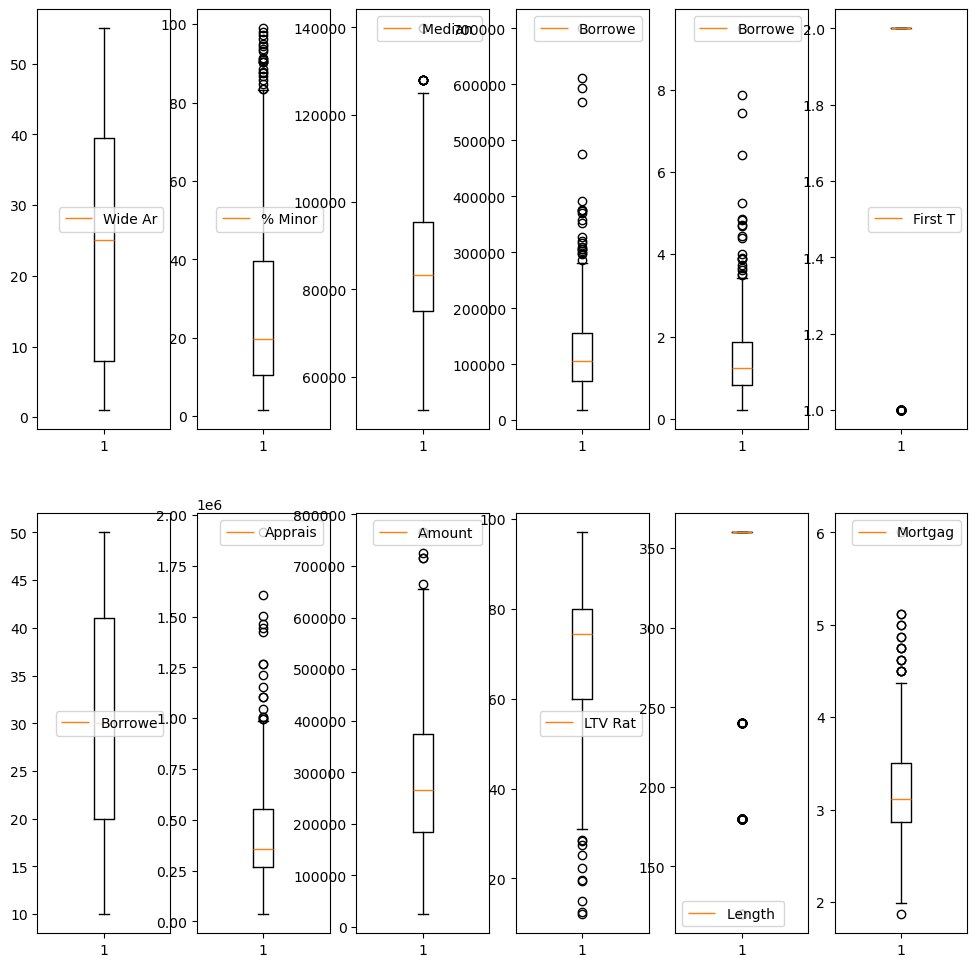

In [1321]:
fig,axes=myplot.subplots(2,6, figsize=(12,12))
for i in list(range(0,2)):
   
    for j in list(range(0,6)):
        
        axes[i,j].boxplot(new_data_for_clustering[reshaped_columns_in_2d[i,j]], label=reshaped_columns_in_2d[i,j][0:7])
        axes[i,j].legend()

myplot.show()

In [1322]:

def outlier_filler(series):
    
    # IQR 
    q1=np.quantile(series,0.25)
    q3=np.quantile(series,0.75)
    iqr=q3-q1
    
    #Whiskers
    lower_whisker=q1-1.5*iqr
    upper_whisker=q3+1.5*iqr
    
    #Outliers
    upper_outlier_index=series[(series>upper_whisker)].index
    
    lower_outlier_index=series[(series<lower_whisker)].index
    
    #Percentile
    p99=np.percentile(series,99)
    p1=np.percentile(series,1)
    
    #Capping
    series.loc[upper_outlier_index]=p99
    series.loc[lower_outlier_index]=p1
    print(series.name)
    #new_data_for_clustering[series.name]=series 

    new_data_for_clustering[series.name]=series




for column in new_data_for_clustering.columns:
    
    outlier_filler(new_data_for_clustering[column].copy())


Wide Area Location Code
% Minority in Local Area
Median Family Income in Local Area
Borrower Annual Income
Borrower Income Ratio
First Time Buyer? (1=Yes, 2=No)
Borrower Debt to Income Ratio
Appraised Value of Home
Amount Borrowed
LTV Ratio
Length of Mortgage in Months
Mortgage Interest Rate


In [1323]:
new_data_for_clustering.describe()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,499,499.0000,499,499.0,499.000000,499,499,499,499,499,499,499.00
unique,47,447.0000,167,190.0,466.000000,2,18,83,63,345,2,35.00
top,6,94.3698,83300,393660.0,4.874558,2,20,265000,245000,80,360,2.87
freq,79,22.0000,26,22.0,20.000000,443,122,18,25,59,386,54.00


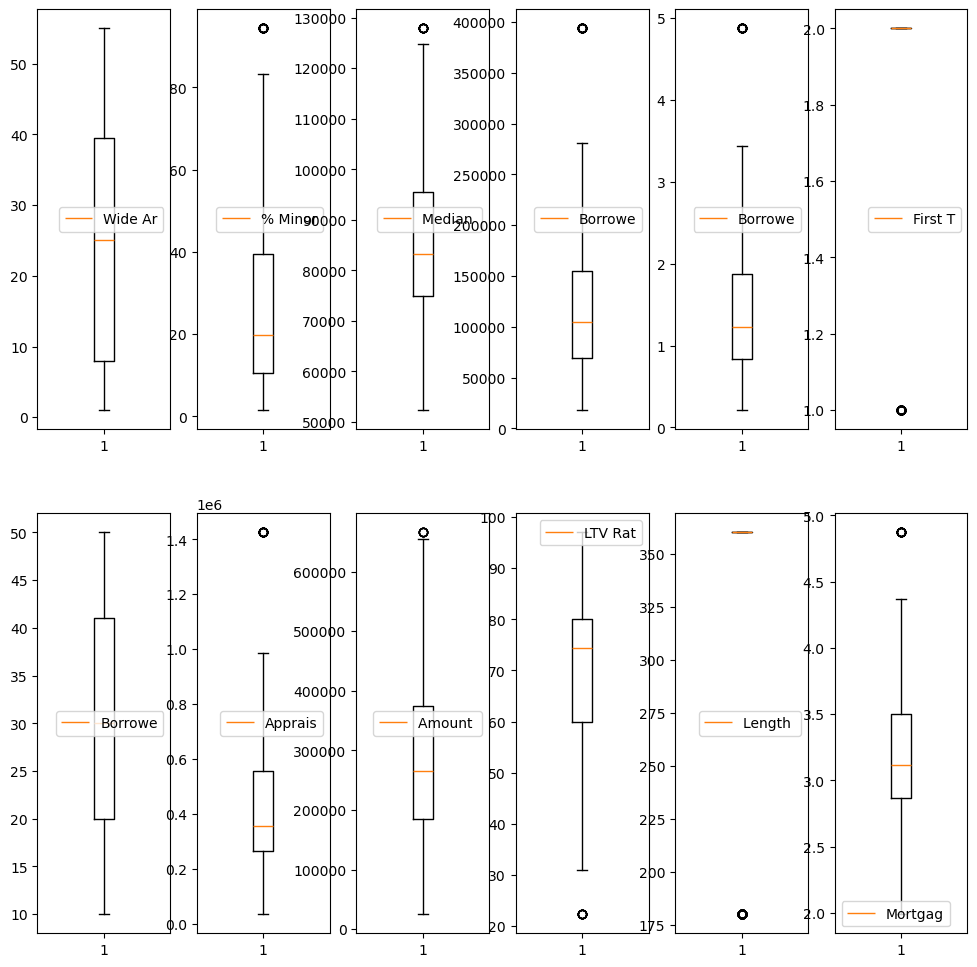

In [1324]:
fig2,axes2=myplot.subplots(2,6, figsize=(12,12))
for i in list(range(0,2)):
   
    for j in list(range(0,6)):
        
        axes2[i,j].boxplot(new_data_for_clustering[reshaped_columns_in_2d[i,j]], label=reshaped_columns_in_2d[i,j][0:7])
        axes2[i,j].legend()

myplot.show()

In [1325]:
p99

94.36979999999998

In [1326]:
print(list(range(1,3)))

[1, 2]


[6767187398951.8545, 6767187398951.8545]
499


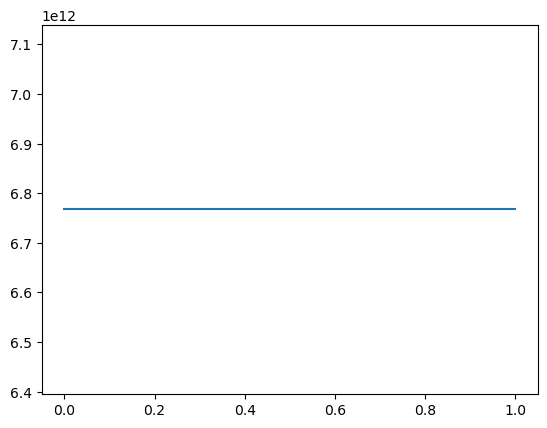

In [1329]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia2=[]

K =range(1,3)

for k in K:
    kmean2=KMeans(n_clusters=k, random_state=42)
    kmean2.fit(new_data_for_clustering)
    inertia2.append(kmean.inertia_)
print(inertia2)
clusters=kmean2.labels_

print(len(clusters))
k_five_means_data_set2=new_data_for_clustering.copy()
k_five_means_data_set2["Cluster"]=clusters
k_five_means_data_set2
myplot.plot(inertia2)

In [1330]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca2=k_five_means_data_set2.drop("Cluster", axis=1)

scalerd_data2=scaler.fit_transform(new_data_for_pca2)

from sklearn.decomposition import PCA
pca2= PCA(n_components=2)
new_scalered_data2=pca2.fit_transform(scalerd_data2)


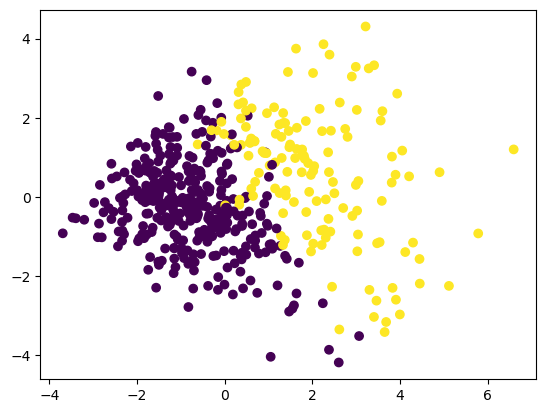

In [1331]:
myplot.scatter(new_scalered_data2[:,0], new_scalered_data2[:,1], c=k_five_means_data_set2["Cluster"])

### 3-~ Let us begin 

In [1333]:
# For comparing the groups we will see the centroid of both group and based on that we can
# Decide which of the attributes makes groups distinguishable.

In [1345]:
numeric_columns=new_data_for_clustering.select_dtypes(include='object').columns
new_data_for_clustering[numeric_columns]=new_data_for_clustering[numeric_columns].apply(pd.to_numeric, errors='coerce')

## Statistical Summary of entire data set

In [1348]:
new_data_for_clustering.describe()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,25.505010,28.495843,85281.763527,124842.725451,1.485429,1.887776,30.336673,4.401439e+05,285292.585170,70.723042,319.238477,3.236937
std,16.545953,24.085100,15633.813116,80017.454927,0.957917,0.315959,12.050549,2.683838e+05,136971.864746,16.693403,75.411996,0.550686
min,1.000000,1.490000,52300.000000,18000.000000,0.211300,1.000000,10.000000,3.500000e+04,25000.000000,22.356800,180.000000,1.990000
25%,8.000000,10.445000,74950.000000,69500.000000,0.834500,2.000000,20.000000,2.650000e+05,185000.000000,60.000000,360.000000,2.870000
50%,25.000000,19.680000,83300.000000,105000.000000,1.225600,2.000000,30.000000,3.550000e+05,265000.000000,74.310000,360.000000,3.120000
75%,39.500000,39.595000,95500.000000,155000.000000,1.879000,2.000000,41.000000,5.550000e+05,375000.000000,80.000000,360.000000,3.500000
max,55.000000,94.369800,127900.000000,393660.000000,4.874558,2.000000,50.000000,1.425400e+06,666000.000000,97.000000,360.000000,4.872600


## Centroid Inforamtion per Cluster

In [1361]:

centroid_information_data_frame=pd.DataFrame(kmean2.cluster_centers_, columns=new_data_for_clustering.columns,index=["Cluster1","Cluster2"])
centroid_information_data_frame

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
Cluster1,27.617318,25.546670,81814.525140,102112.569832,1.280857,1.860335,30.276536,308296.089385,220251.396648,73.487218,315.251397,3.274208
Cluster2,20.141844,35.983813,94085.106383,182554.751773,2.004841,1.957447,30.489362,774906.382979,450432.624113,63.704780,329.361702,3.142306


## PCA information per component

In [1358]:
pca_comparision=pd.DataFrame(pca2.components_, columns=new_data_for_clustering.columns, index=['PC1','PC2'])
pca_comparision

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
PC1,-0.123162,0.134366,0.209762,0.479081,0.414277,0.139118,-0.159681,0.472513,0.453778,-0.178763,-0.041030,-0.118144
PC2,-0.212738,0.303042,0.378151,-0.340426,-0.456200,0.022196,0.461417,0.305700,0.231961,-0.136909,0.114232,-0.058751


In [1366]:
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=new_data_for_clustering.columns
)

ValueError: Shape of passed values is (3, 13), indices imply (3, 12)

In [ ]:
centroid_diff = (centroids.loc[0] - centroids.loc[1]).abs()
centroid_diff.sort_values(ascending=False)

In [1365]:
df_clustered = new_data_for_clustering.copy()
df_clustered['cluster'] = kmeans.labels_[0:499]

within_std = (
    df_clustered
    .groupby('cluster')
    .std()
    .mean()
)

importance = centroid_diff / within_std
importance.sort_values(ascending=False)


NameError: name 'centroid_diff' is not defined